### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

Remove duplicates

In [133]:
print("Original size of dataframe : ", data.shape)
data.drop_duplicates()
print("After removing duplicates, size = ", data.shape)

Original size of dataframe :  (12684, 26)
After removing duplicates, size =  (12684, 26)


In [10]:
#Check for null values
null_variables = data.isnull().sum().sort_values()
print(null_variables)

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
# keeping data as-is

4. What proportion of the total observations chose to accept the coupon?



In [135]:
print("Total acceptance rate : ", data['Y'].mean())

Total acceptance rate :  0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

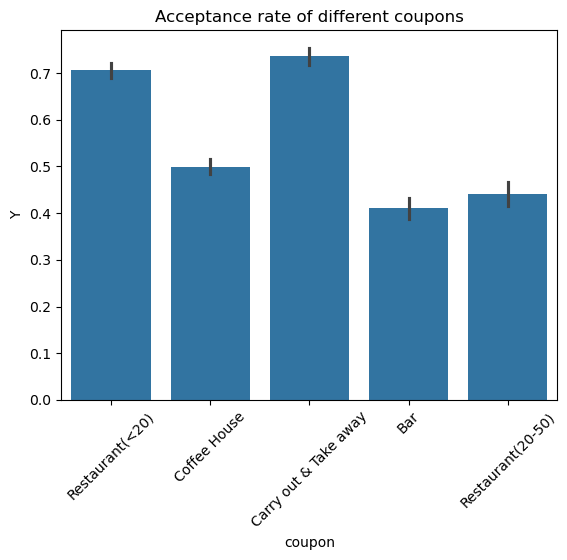

In [139]:
sns.barplot(data = data, x = 'coupon', y = 'Y')
plt.xticks(rotation = 45)
plt.title("Acceptance rate of different coupons")
plt.show()

6. Use a histogram to visualize the temperature column.

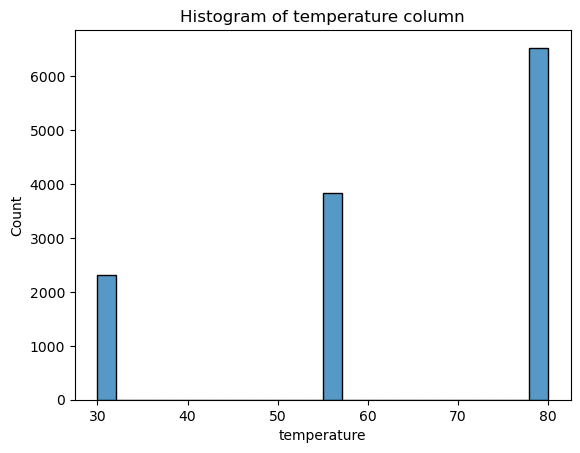

In [145]:
sns.histplot(data = data, x = 'temperature')
plt.title("Histogram of temperature column")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [148]:
df_bar = data.loc[data['coupon'] == 'Bar']
print(f"Created a new dataframe of bar coupons with {df_bar.shape[0]} coupons")

Created a new dataframe of bar coupons with 2017 coupons


2. What proportion of bar coupons were accepted?


In [150]:
print('Proportion of bar coupons that were accepted : ', df_bar['Y'].mean())

Proportion of bar coupons that were accepted :  0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


    To approach this question, let us do the following :
- Visualize the acceptance rate of bar coupons by frequency of bar visits per month
- Find acceptance rate of folks who have 3 or fewer visits per month
- Find acceptance rate of folks who have more than 3 visits per month

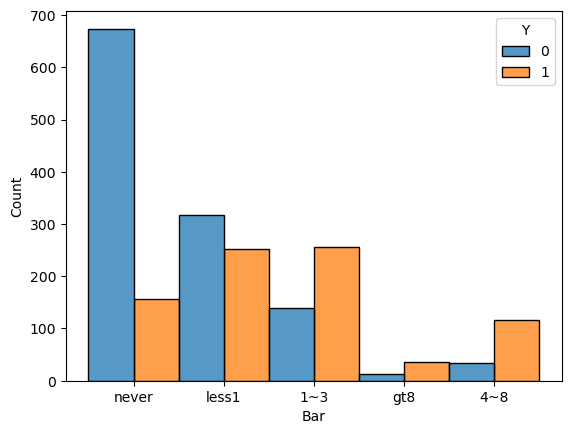

In [151]:
#Visualizing the acceptance rate of bar coupons based on frequency of bar visits
sns.histplot(data = df_bar, x = 'Bar', hue = 'Y', multiple = 'dodge')
plt.show()

In [153]:
three_or_fewer = ['never', 'less1', '1~3']
bar_accept_rate_three_fewer = df_bar.loc[df_bar['Bar'].isin(less_than_3)]['Y'].mean()
bar_accept_rate_more_three = df_bar.loc[~df_bar['Bar'].isin(less_than_3)]['Y'].mean()

print('Acceptance rate of bar coupons with 3 or fewer visits  - ', '{:.2%}'.format(bar_accept_rate_three_fewer))
print('Acceptance rate of bar coupons with more than 3 visits - ', '{:.2%}'.format(bar_accept_rate_more_three))

Acceptance rate of bar coupons with 3 or fewer visits  -  37.06%
Acceptance rate of bar coupons with more than 3 visits -  73.18%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


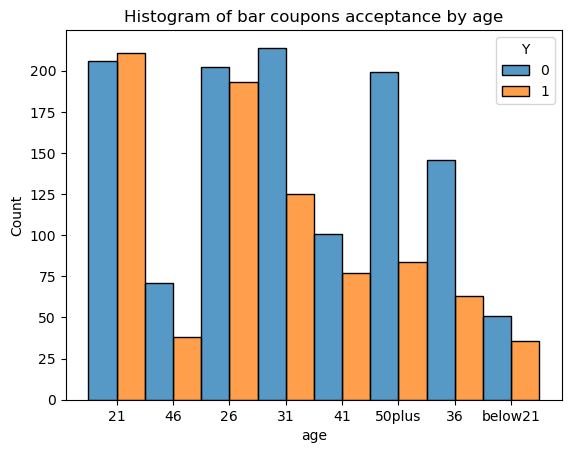

Overall Bar coupon acceptance rate -  41.00%
Bar coupon acceptance rate of drivers who go more than once a month and over the age of 25 -  69.52%
Bar coupon acceptance rate of other drivers -  33.50%


In [156]:
#Visualizing the acceptance rate based on age
sns.histplot(data = df_bar, x = 'age', hue = 'Y', multiple = 'dodge')
plt.title('Histogram of bar coupons acceptance by age')
plt.show()

#Splice data by age > 25 and frequency more than once a month
age_over_25 = ['46', '26', '31', '41', '50plus', '36']
more_than_once_month = ['1~3', 'gt8', '4~8']

bar_age_query = 'Bar in @more_than_once_month and age in @age_over_25'

bar_age_query_result = df_bar.query(bar_age_query)
bar_age_not_in_query = df_bar[~df_bar.index.isin(bar_age_query_result.index)]

accept_rate_bar_age = bar_age_query_result['Y'].mean()
accept_rate_bar_others = bar_age_not_in_query['Y'].mean()

print("Overall Bar coupon acceptance rate - ", '{:.2%}'.format(df_bar['Y'].mean()))
print("Bar coupon acceptance rate of drivers who go more than once a month and over the age of 25 - ",'{:.2%}'.format(accept_rate_bar_age))
print("Bar coupon acceptance rate of other drivers - ",'{:.2%}'.format(accept_rate_bar_others))


**Findings**
- From above, we see that bar coupons acceptance rate of those who go more than once a month and over the age of 25 is more than twice as high as others.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [157]:
# First fetching unique values for column 'passanger' and 'occupation'
print("Values for field passanger - ", df_bar['passanger'].unique())
print("Values for occupation - ", df_bar['occupation'].unique())

Values for field passanger -  ['Kid(s)' 'Alone' 'Friend(s)' 'Partner']
Values for occupation -  ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']


In [161]:
# Running a query to fetch the data for question 5
query1 = 'Bar in @more_than_once_month and occupation not in "Farming Fishing & Forestry" and passanger not in "Kid(s)"'
bar_accept_rate1 = df_bar.query(query1)['Y'].mean()
print("Acceptance rate of drivers who go to bars more than once a month and had \
passangers that were not a kid and occupations other than farming, fishing or forestry - ",'{:.2%}'.format(bar_accept_rate1))

Acceptance rate of drivers who go to bars more than once a month and had passangers that were not a kid and occupations other than farming, fishing or forestry -  71.32%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [165]:
# First query - go to bars more than once a month, had passangers that were not a kid and were not widowed
query61 = 'Bar in @more_than_once_month and passanger not in "Kids(s)" and maritalStatus not in "Widowed"'
accept_rate61 = df_bar.query(query61)['Y'].mean()

print("1. Acceptance rate of those who go to bars more than once a month, had passangers \
that were not a kid and were not widowed - ", '{:.2%}'.format(accept_rate61))

# Second query - go to bars more than once a month and under the age of 30
age_30_under = ['21', '26', 'below21']

query62 = 'Bar in @more_than_once_month and age in @age_30_under'
accept_rate62 = df_bar.query(query62)['Y'].mean()

print("2. Acceptance rate of those who go to bars more than once a month and under the age of 30 - ", '{:.2%}'.format(accept_rate62))

# Third query - go cheap restaurants more than 4 times a month and income less than 50K
income_less_50K = ['$37500 - $49999', '$12500 - $24999', '$25000 - $37499', 'Less than $12500']
more_than_4_times = ['4~8', 'gt8']

query63 = 'RestaurantLessThan20 in @more_than_4_times and income in @income_less_50K'
accept_rate63 = df_bar.query(query63)['Y'].mean()

print("3. Acceptance rate of those who go to cheap restaurants more \
than 4 times a month and income less than 50K - ", '{:.2%}'.format(accept_rate63))

1. Acceptance rate of those who go to bars more than once a month, had passangers that were not a kid and were not widowed -  68.79%
2. Acceptance rate of those who go to bars more than once a month and under the age of 30 -  72.17%
3. Acceptance rate of those who go to cheap restaurants more than 4 times a month and income less than 50K -  45.35%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Bar observations**
- Go to Bar more than once a month
- No kids passanger
- Age less than 30
- Income greater than 50k and do not go to cheap restaurants more than 4 times

Around 71% probablity of accepting bar coupons

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Income based analysis**

8. Visualizing the acceptance rates of different coupons based on income. Which income group is likely to accept a given coupon

In [166]:
# fetch all the income values
print(data['income'].unique())

['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


In [169]:
# Split the income group. Less < 50K into one dataframe and greater and 50K into another
df_50K_less = data.loc[data['income'].isin(income_less_50K)]
df_50K_more = data.loc[~data['income'].isin(income_less_50K)]
print(f'There are {df_50K_less.shape[0]} folks with less than 50K income and {df_50K_more.shape[0]} with more than 50K income')

There are 6691 folks with less than 50K income and 5993 with more than 50K income


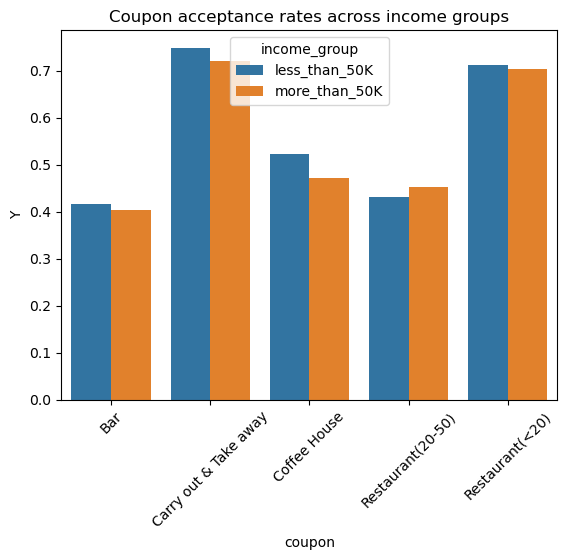

In [170]:
# Fetch the acceptance rate for both income groups and visualize them side-by-side
df_50K_less = df_50K_less.groupby('coupon')['Y'].mean().reset_index()
df_50K_more = df_50K_more.groupby('coupon')['Y'].mean().reset_index()

# Add income group in both dataframes
df_50K_less['income_group'] = "less_than_50K"
df_50K_more['income_group'] = "more_than_50K"

# Concatenate the 2 income dataframes to get a single dataframe for visualization
df_income = pd.concat([df_50K_less, df_50K_more])

# Draw a bar chart
sns.barplot(data = df_income, x = 'coupon', y = 'Y', hue = 'income_group')
plt.xticks(rotation = 45)
plt.title('Coupon acceptance rates across income groups')
plt.show()

**Findings from above**
- High income group (> 50K) is likely to accept coupons to high-end restaurants more than low income group
- For all other coupons, the lower income group is likely to accept them over higher income group

**Analysis of Carry out & take away coupons**

9. Acceptance rate of folks who accepted carry out coupons based on frequency of visits. Who is most and least likely to accept the coupon

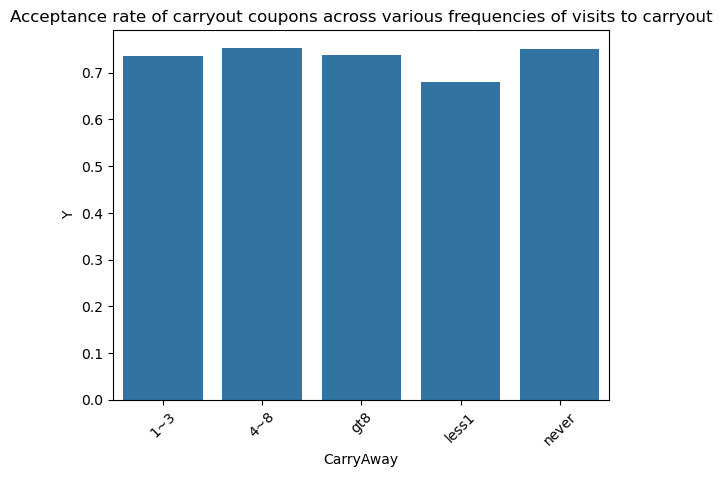

In [172]:
# Create a dataframe for carryout coupons
df_carryout = data.loc[data['coupon'] == 'Carry out & Take away']

# get the acceptance rate
df_carryout = df_carryout.groupby('CarryAway')['Y'].mean().reset_index()
sns.barplot(data = df_carryout, x = 'CarryAway', y = 'Y')
plt.xticks(rotation = 45)
plt.title('Acceptance rate of carryout coupons across various frequencies of visits to carryout')
plt.show()

In [129]:
print(less_than_3)

['never', 'less1', '1~3']


In [130]:
df_carryout_lowfreq = df_carryout.loc[df_carryout['CarryAway'].isin(less_than_3)].groupby('CarryAway')['Y'].mean().reset_index()
print(df_carryout_lowfreq)

  CarryAway         Y
0       1~3  0.736111
1     less1  0.679887
2     never  0.750000


In [131]:
df_carryout_rate = df_carryout.groupby('CarryAway')['Y'].mean().reset_index()
print(df_carryout_rate)

  CarryAway         Y
0       1~3  0.736111
1       4~8  0.753659
2       gt8  0.738411
3     less1  0.679887
4     never  0.750000


In [132]:
df_coffee_rate = data.loc[data['coupon'] == 'Coffee House'].groupby('CoffeeHouse')['Y'].mean().reset_index()
print(df_coffee_rate)

  CoffeeHouse         Y
0         1~3  0.647793
1         4~8  0.685874
2         gt8  0.657895
3       less1  0.481860
4       never  0.188781
